In [ ]:
!python -m venv venv && source venv/bin/activate
!pip install --upgrade pip
!pip install datasets scikit-learn pandas matplotlib joblib

Error: Command '['/content/venv/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
import numpy as np
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import joblib

RANDOM_STATE = 42

In [ ]:
ds = load_dataset("UniqueData/email-spam-classification")
df = ds['train'].to_pandas()            # this dataset has only a 'train' split
df.head()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

email_spam.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/84 [00:00<?, ? examples/s]

title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text      type  
0  Hi James,\n\nHave you claim your complimentary...      spam  
1  \nalt_text\nCongratulations, you just earned\n...  not spam  
2  Here's your GitHub launch code, @Mortyj420!\n ...  not spam  
3  Hello,\n \nThank you for contacting the Virtua...  not spam  
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...      spam

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_3.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('text')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in _df_4.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('type')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_13.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('text')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in _df_14.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('type')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# These Checks for rows, missing values, label balance
print(df.shape)
print(df['type'].value_counts(dropna=False))

# If any missing text combine title+text (if title exists) or drop missing
df['content'] = (df['title'].fillna('') + ' ' + df['text'].fillna('')).str.strip()
df = df[df['content'].str.len() > 0].copy()

(84, 3)
type
not spam    58
spam        26
Name: count, dtype: int64


In [ ]:
# Train/test split
X = df['content'].values
y = df['type'].map({'not spam': 0, 'spam': 1}).values   # map to 0/1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

In [ ]:
#The 5 simple classifer using TF-IDF (Term Frequency-Inverse Document Frequency)
common_tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words='english', min_df=1)

models = {
    "LogisticRegression": Pipeline([('tfidf', common_tfidf),
                                   ('clf', LogisticRegression(max_iter=2000, random_state=RANDOM_STATE))]),
    "MultinomialNB": Pipeline([('tfidf', common_tfidf),
                               ('clf', MultinomialNB())]),
    "LinearSVC": Pipeline([('tfidf', common_tfidf),
                           ('clf', LinearSVC(max_iter=10000, random_state=RANDOM_STATE))]),
    "RandomForest": Pipeline([('tfidf', common_tfidf),
                              ('clf', RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE))]),
    "KNeighbors": Pipeline([('tfidf', common_tfidf),
                            ('clf', KNeighborsClassifier(n_neighbors=5))]),
}

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

cv_results = {}
for name, pipe in models.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_results[name] = scores
    print(f"{name}: CV acc mean={scores.mean():.4f} std={scores.std():.4f} (n={len(scores)})")


LogisticRegression: CV acc mean=0.6868 std=0.0236 (n=5)
MultinomialNB: CV acc mean=0.7022 std=0.0409 (n=5)
LinearSVC: CV acc mean=0.7319 std=0.0315 (n=5)
RandomForest: CV acc mean=0.7022 std=0.0409 (n=5)
KNeighbors: CV acc mean=0.7758 std=0.0081 (n=5)


In [ ]:
test_scores = {}
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_scores[name] = acc
    print(f"=== {name} ===")
    print("Test accuracy:", acc)
    print(classification_report(y_test, y_pred, target_names=['not spam','spam'], zero_division=0))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    # If you want ROC AUC (binary)
    try:
        y_proba = pipe.predict_proba(X_test)[:,1]
        print("ROC AUC:", roc_auc_score(y_test, y_proba))
    except Exception:
        # Some classifiers (LinearSVC) do not have predict_proba
        pass

=== LogisticRegression ===
Test accuracy: 0.7058823529411765
              precision    recall  f1-score   support

    not spam       0.71      1.00      0.83        12
        spam       0.00      0.00      0.00         5

    accuracy                           0.71        17
   macro avg       0.35      0.50      0.41        17
weighted avg       0.50      0.71      0.58        17

Confusion matrix:
 [[12  0]
 [ 5  0]]
ROC AUC: 0.8666666666666667
=== MultinomialNB ===
Test accuracy: 0.7058823529411765
              precision    recall  f1-score   support

    not spam       0.71      1.00      0.83        12
        spam       0.00      0.00      0.00         5

    accuracy                           0.71        17
   macro avg       0.35      0.50      0.41        17
weighted avg       0.50      0.71      0.58        17

Confusion matrix:
 [[12  0]
 [ 5  0]]
ROC AUC: 0.8333333333333334
=== LinearSVC ===
Test accuracy: 0.6470588235294118
              precision    recall  f1-score  

/tmp/ipython-input-2299429791.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_results[name] for name in models.keys()], labels=list(models.keys()), showmeans=True)


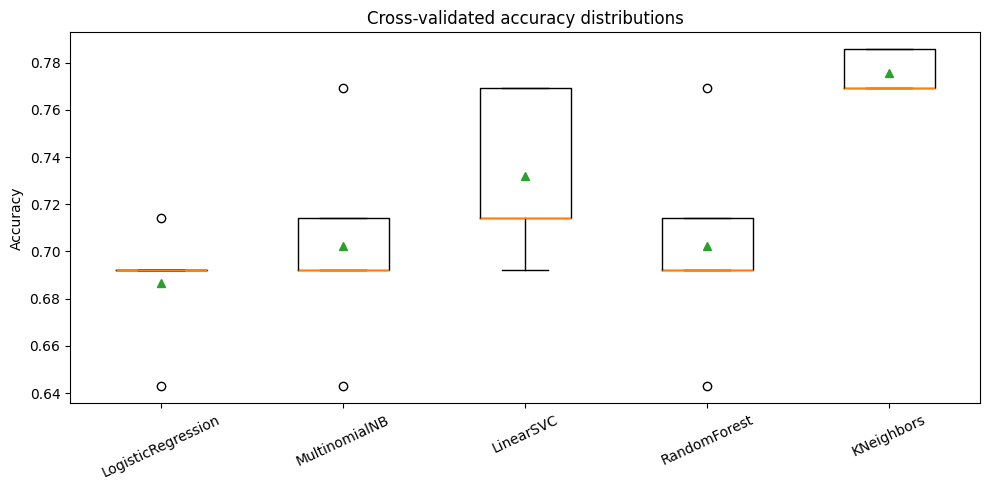

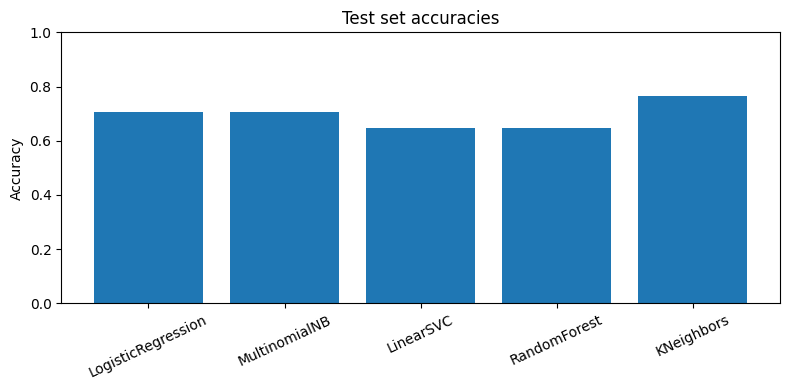

In [ ]:
# Prepare data
import matplotlib.pyplot as plt

# 1) Boxplot of CV accuracies
plt.figure(figsize=(10,5))
plt.boxplot([cv_results[name] for name in models.keys()], labels=list(models.keys()), showmeans=True)
plt.title("Cross-validated accuracy distributions")
plt.ylabel("Accuracy")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

# 2) Bar chart of test accuracies
plt.figure(figsize=(8,4))
names = list(test_scores.keys())
scores = [test_scores[n] for n in names]
plt.bar(names, scores)
plt.title("Test set accuracies")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()


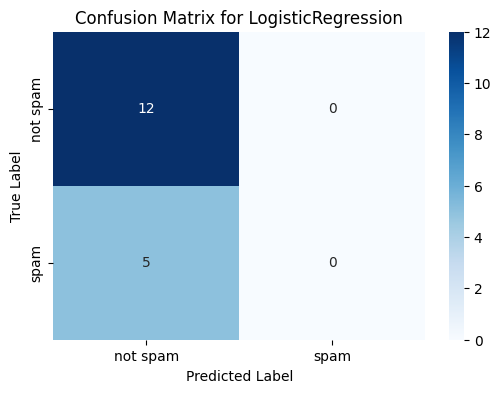

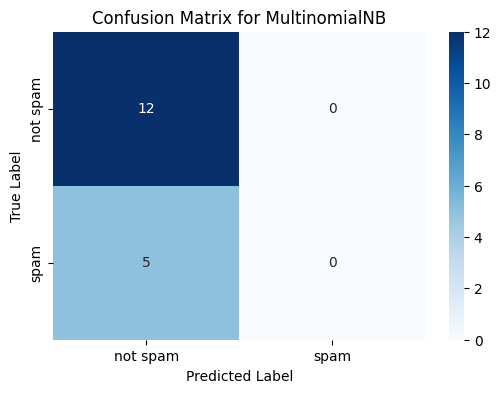

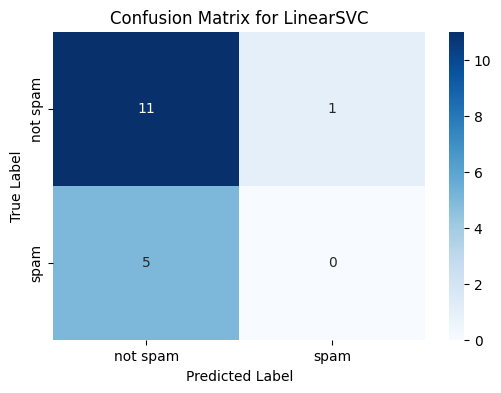

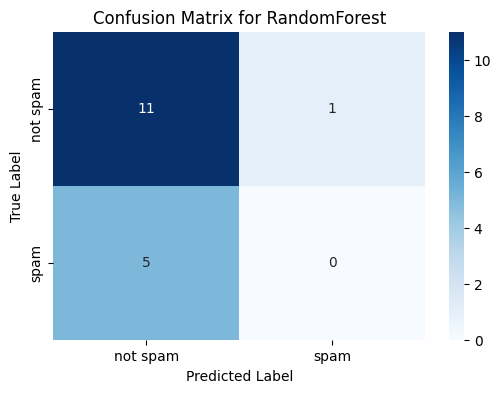

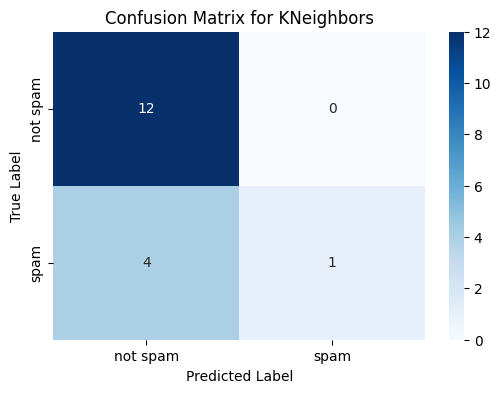

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['not spam', 'spam'], yticklabels=['not spam', 'spam'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
# Best by test
best_by_test = max(test_scores.items(), key=lambda x: x[1])
print("Best by test accuracy:", best_by_test)

# Best by CV mean
cv_means = {name: cv_results[name].mean() for name in cv_results}
best_by_cv = max(cv_means.items(), key=lambda x: x[1])
print("Best by CV mean:", best_by_cv)

Best by test accuracy: ('KNeighbors', 0.7647058823529411)
Best by CV mean: ('KNeighbors', np.float64(0.7758241758241758))
